In [2]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
dataFF = pd.read_csv('dataFF.csv')

In [5]:
def calc_entropy(column):
    counts = np.bincount(column)
    probability = counts / len(column)
    entropy = 0
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob, 2)

    n = len(counts)
    max_entropy = math.log2(n)  # Entropie maximale

    # Normalise l'entropie
    normalized_entropy = -entropy / max_entropy if max_entropy > 0 else 0

    return normalized_entropy

In [6]:
dataFF.columns

Index(['Unnamed: 0', 'Doctor Name', 'Specialty', 'card_0', 'card_3', 'card_4',
       'Latitude', 'Longitude', 'Skills Processed', 'RPPS', 'Nb Skills',
       'moyens_paiement', 'carte_vitale', 'secteur', 'Présentation',
       'Langues parlées', 'Diplômes nationaux et universitaires',
       'Autres formations', 'Expériences', 'Travaux et publications',
       'Prix et distinctions', 'site', 'Site web', 'Formations',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b', 'Travaux et publications b', 'Nb langues',
       'Expériences b', 'Formations b', 'Carac_card_1', 'Transport', 'Parking',
       'Infos', 'Coordonnées', 'Sans RDV', 'nb terms card_0',
       'nb terms card_3', 'nb terms card_4', 'nb carac card_0',
       'nb carac card_3', 'nb carac card_4', 'APL', 'Fibre', 'identifiantpp',
       'code_civilité', 'Nom', 'Prénom', 'RPPS_doc', 'code_geo', 'xcl', 'ycl',
       'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f

In [7]:
dataFF.drop(columns= ['Unnamed: 0'],inplace=True)

In [8]:
liste_var = ['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','APL']
entropy={}
for nom_colonne in liste_var : 
    entropy[nom_colonne]=calc_entropy(dataFF[nom_colonne])
print(entropy)

{'Nb Skills': 0.6183050479262006, 'moyens_paiement': 0.15109697051711368, 'carte_vitale': 0.15109697051711368, 'secteur': 0.7232282868003711, 'site': 0.8865408928220899, 'Diplômes nationaux et universitaires b': 0.9876925088958034, 'Nb caractères présentation': 0.44465875952903783, 'Autres formations b': 0.9108783787500366, 'Travaux et publications b': 0.4262286569981449, 'Nb langues': 0.8705256941582558, 'Expériences b': 0.6152538910563409, 'Carac_card_1': 0.6014891141565165, 'Transport': 0.2580186686648155, 'Parking': 0.9945386816500111, 'Infos': -0.0, 'Coordonnées': 0.9986359641585718, 'Formations b': 0.8865408928220899, 'nb terms card_0': 0.6477276757936034, 'nb terms card_3': 0.6682706108136939, 'nb terms card_4': 0.6536016565310085, 'nb carac card_0': 0.3277286024930658, 'nb carac card_3': 0.3456666965456728, 'nb carac card_4': 0.329264056647293, 'APL': 0.5401725999265179}


In [9]:
liste_var_descri=['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Sans RDV', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre']

In [10]:
print(dataFF[liste_var_descri].describe())

       Nb Skills  moyens_paiement  carte_vitale    secteur       site  \
count  46.000000        46.000000     46.000000  46.000000  46.000000   
mean    1.565217         0.978261      0.978261   1.195652   0.304348   
std     2.544294         0.147442      0.147442   0.542405   0.465215   
min     0.000000         0.000000      0.000000   0.000000   0.000000   
25%     0.000000         1.000000      1.000000   1.000000   0.000000   
50%     0.000000         1.000000      1.000000   1.000000   0.000000   
75%     2.000000         1.000000      1.000000   1.750000   1.000000   
max    10.000000         1.000000      1.000000   2.000000   1.000000   

       Diplômes nationaux et universitaires b  Nb caractères présentation  \
count                               46.000000                   46.000000   
mean                                 0.565217                  769.739130   
std                                  0.501206                  682.459846   
min                               

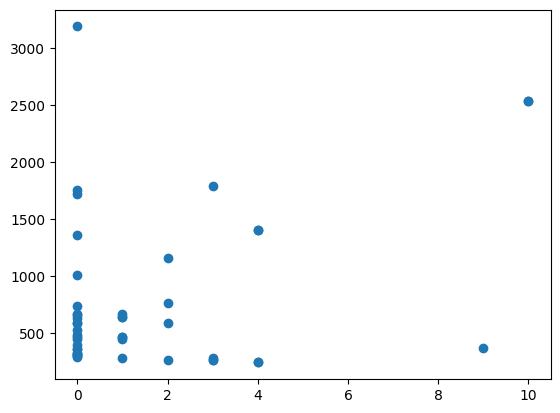

In [11]:
plt.scatter(dataFF['Nb Skills'],dataFF['Nb caractères présentation'])

# Version normalisée :

In [13]:
def normalize_dataframe(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

dataFF_red = dataFF[liste_var_descri]
dataFF_red_norm = normalize_dataframe(dataFF_red)

In [14]:
print(dataFF_red_norm.describe())

       Nb Skills  moyens_paiement  carte_vitale    secteur       site  \
count  46.000000        46.000000     46.000000  46.000000  46.000000   
mean    0.156522         0.978261      0.978261   0.597826   0.304348   
std     0.254429         0.147442      0.147442   0.271202   0.465215   
min     0.000000         0.000000      0.000000   0.000000   0.000000   
25%     0.000000         1.000000      1.000000   0.500000   0.000000   
50%     0.000000         1.000000      1.000000   0.500000   0.000000   
75%     0.200000         1.000000      1.000000   0.875000   1.000000   
max     1.000000         1.000000      1.000000   1.000000   1.000000   

       Diplômes nationaux et universitaires b  Nb caractères présentation  \
count                               46.000000                   46.000000   
mean                                 0.565217                    0.179851   
std                                  0.501206                    0.231264   
min                               